Importamos las librerías necesarias.

In [55]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns

Cargamos el dataset y preparamos los datos para analizarlos.

In [56]:
train_data_no_modified = pd.read_csv("train.csv")
test_data_no_modified = pd.read_csv("test.csv")

Mostramos el tipo de datos en cada columna y los primeros registros para entender el dataset.

In [57]:
print (train_data_no_modified.dtypes)
train_data_no_modified.head()

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [58]:
print (test_data_no_modified.dtypes)
test_data_no_modified.head()

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
dtype: object


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


Información básica

In [59]:
train_num_rows, train_num_cols = train_data_no_modified.shape
print(f'Train data \nNumber of rows : {train_num_rows}\nNumber of columns: {train_num_cols}\n')

train_data_no_modified.info()

Train data 
Number of rows : 381109
Number of columns: 12

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [60]:
test_num_rows, test_num_cols = test_data_no_modified.shape
print(f'Train data \nNumber of rows : {test_num_rows}\nNumber of columns: {test_num_cols}\n')

test_data_no_modified.info()

Train data 
Number of rows : 127037
Number of columns: 11

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


Revisamos la variable objetivo, es decir, la columna `Response` y como se distribuye.

In [61]:
categorias = train_data_no_modified['Response'].unique()
print("Categories:", categorias)
print(train_data_no_modified['Response'].value_counts())

Categories: [1 0]
Response
0    334399
1     46710
Name: count, dtype: int64


Ahora pasamos a revisar si hay NaNs, para ello calculamos la cantidad de valores nulos por columna y en todo el dataset.

In [62]:
print(train_data_no_modified.isna().sum())
print("\nLlavors, total de NaNs: ", train_data_no_modified.isna().sum().sum())
train_data_no_modified.isnull().sum()
print("Llavors, total de valors Null: ", train_data_no_modified.isnull().sum().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Llavors, total de NaNs:  0
Llavors, total de valors Null:  0


In [63]:
print(test_data_no_modified.isna().sum())
print("\nLlavors, total de NaNs: ", test_data_no_modified.isna().sum().sum())
test_data_no_modified.isnull().sum()
print("nLlavors, total de valors Null: ", test_data_no_modified.isnull().sum().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

Llavors, total de NaNs:  0
nLlavors, total de valors Null:  0


Al ver que no tenemos NaNs podemos pasar a analizar la correlación, por lo que calculamos la correlación de los atributos numéricos con la variable objetivo `Response`.

Correlación entre cada atributo y la variable objetivo (Response):
id                     -0.001368
Age                     0.111147
Driving_License         0.010155
Region_Code             0.010570
Previously_Insured     -0.341170
Annual_Premium          0.022575
Policy_Sales_Channel   -0.139042
Vintage                -0.001050
Name: Response, dtype: float64


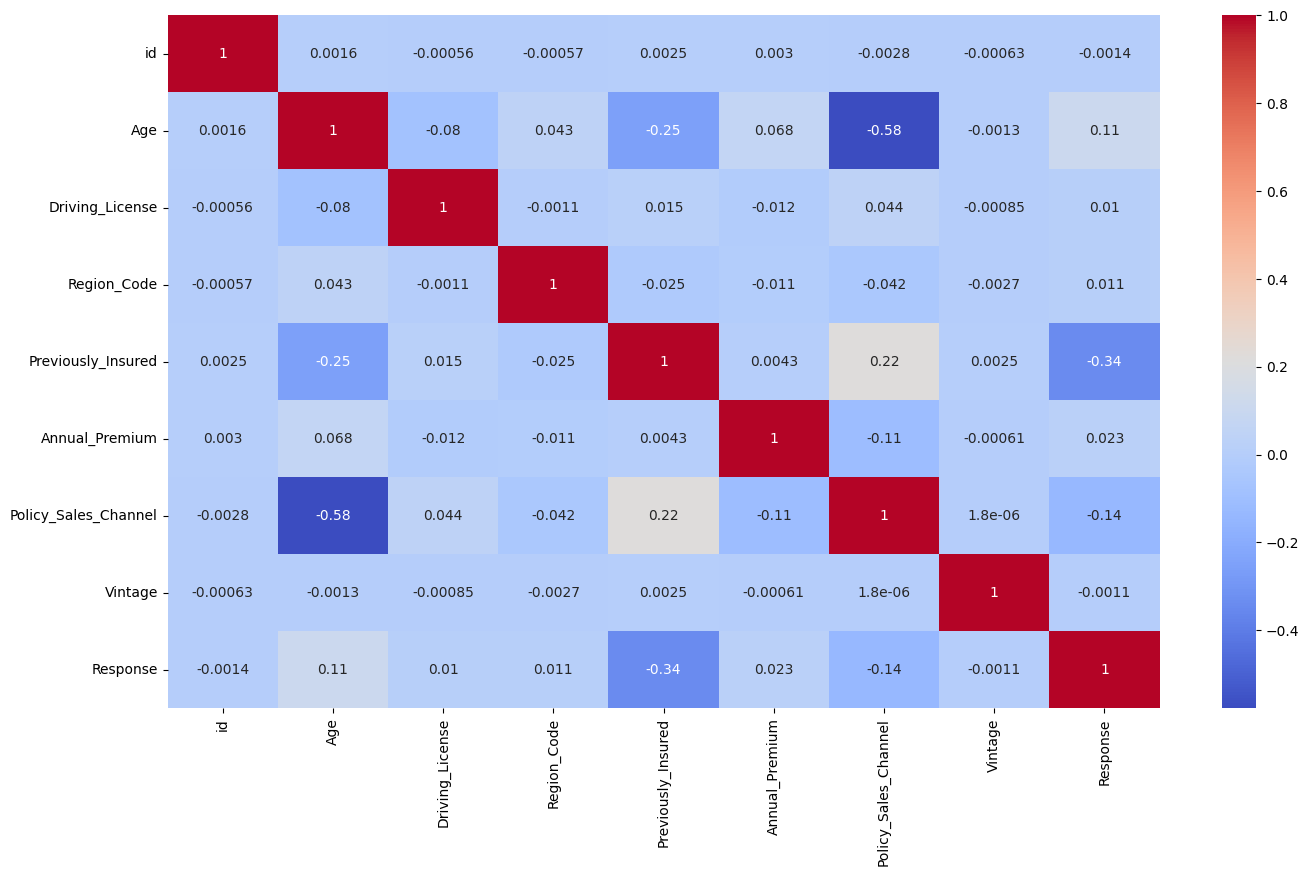

In [64]:
target = 'Response'
numeric_attributes = train_data_no_modified.select_dtypes(include=[np.number]).columns.tolist()
attributes = [k for k in numeric_attributes if k != target]

correlations = train_data_no_modified[attributes + [target]].corr()[target].drop(target)

print("Correlación entre cada atributo y la variable objetivo (Response):")
print(correlations)
plt.figure(figsize=(16,9))
sns.heatmap(train_data_no_modified[attributes + [target]].corr(), annot=True, cmap="coolwarm")
plt.show()

Ya podemos empezar a centrarnos en la transformación de los datos y lo hacemos eliminando columnas que creemos poco útiles y que creemos que no aportan significativamente al análisis. Para escoger estas columnas nos basamos en el resultado del heatmap y decidimos eliminar `id`, `Driving_License`, `Region_Code` y `Vintage`.

In [65]:
drop_column = ['id','Driving_License','Region_Code','Vintage']
train_data_no_modified.drop(drop_column, axis=1, inplace = True)
train_data_no_modified

,Gender,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,Male,44,0,> 2 Years,Yes,40454.0,26.0,1
1,Male,76,0,1-2 Year,No,33536.0,26.0,0
2,Male,47,0,> 2 Years,Yes,38294.0,26.0,1
3,Male,21,1,< 1 Year,No,28619.0,152.0,0
4,Female,29,1,< 1 Year,No,27496.0,152.0,0
...,...,...,...,...,...,...,...,...
381104,Male,74,1,1-2 Year,No,30170.0,26.0,0
381105,Male,30,1,< 1 Year,No,40016.0,152.0,0
381106,Male,21,1,< 1 Year,No,35118.0,160.0,0
381107,Female,68,0,> 2 Years,Yes,44617.0,124.0,0


In [66]:
drop_column = ['id','Driving_License','Region_Code','Vintage']
test_data_no_modified.drop(drop_column, axis=1, inplace = True)
test_data_no_modified

,Gender,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel
0,Male,25,1,< 1 Year,No,35786.0,152.0
1,Male,40,0,1-2 Year,Yes,33762.0,7.0
2,Male,47,0,1-2 Year,Yes,40050.0,124.0
3,Male,24,1,< 1 Year,Yes,37356.0,152.0
4,Male,27,1,< 1 Year,No,59097.0,152.0
...,...,...,...,...,...,...,...
127032,Female,26,1,< 1 Year,No,30867.0,152.0
127033,Female,38,0,1-2 Year,Yes,28700.0,122.0
127034,Male,21,1,< 1 Year,No,29802.0,152.0
127035,Male,71,1,1-2 Year,No,62875.0,26.0


Para poder continuar realizamos la codificación de las variables categóricas, que en nuestro caso son `Gender`, `Vehicle_Age`, `Vehicle_Damage` para convertirlas a valores numéricos.

Empezamos con `Gender` pasando a 1 si es 'Male' y a 0 si es 'Female', por lo que al final los valores serán [1 0]

In [67]:
train_data_no_modified['Gender'] = train_data_no_modified['Gender'].map({'Male': 1, 'Female': 0})
test_data_no_modified['Gender'] = test_data_no_modified['Gender'].map({'Male': 1, 'Female': 0})

print(train_data_no_modified['Gender'].unique())
print(test_data_no_modified['Gender'].unique())
train_data_no_modified

[1 0]
[1 0]


,Gender,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,1,44,0,> 2 Years,Yes,40454.0,26.0,1
1,1,76,0,1-2 Year,No,33536.0,26.0,0
2,1,47,0,> 2 Years,Yes,38294.0,26.0,1
3,1,21,1,< 1 Year,No,28619.0,152.0,0
4,0,29,1,< 1 Year,No,27496.0,152.0,0
...,...,...,...,...,...,...,...,...
381104,1,74,1,1-2 Year,No,30170.0,26.0,0
381105,1,30,1,< 1 Year,No,40016.0,152.0,0
381106,1,21,1,< 1 Year,No,35118.0,160.0,0
381107,0,68,0,> 2 Years,Yes,44617.0,124.0,0


In [68]:
train_data_no_modified['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

En el caso de `Vehicle_Age` encontramos 3 posibilidades, por lo que los posibles valores deben ser [2 1 0], siendo 0 para '< 1 Year', 1 para '1-2 Year' y 2 para '> 2 Years'.

In [69]:
train_data_no_modified['Vehicle_Age'] = train_data_no_modified['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})
test_data_no_modified['Vehicle_Age'] = test_data_no_modified['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})
print(train_data_no_modified[['Vehicle_Age']].head())
print(train_data_no_modified['Vehicle_Age'].unique())

   Vehicle_Age
0            2
1            1
2            2
3            0
4            0
[2 1 0]


Para `Vehicle_Damage` tenemos 2 casos posibles, que son 'Yes', el cual transformaremos en 1 y 'No', que transformaremos en 0; así obtenemos las posibilidades [1 0].

In [70]:
train_data_no_modified['Vehicle_Damage'] = train_data_no_modified['Vehicle_Damage'].map({'No': 0, 'Yes': 1})
print(train_data_no_modified[['Vehicle_Damage']].head())
print(train_data_no_modified['Vehicle_Damage'].unique())
test_data_no_modified['Vehicle_Damage'] = test_data_no_modified['Vehicle_Damage'].map({'No': 0, 'Yes': 1})
print(test_data_no_modified[['Vehicle_Damage']].head())
print(test_data_no_modified['Vehicle_Damage'].unique())

   Vehicle_Damage
0               1
1               0
2               1
3               0
4               0
[1 0]
   Vehicle_Damage
0               0
1               1
2               1
3               1
4               0
[0 1]


Para ver la tabla después de las correcciones anteriores la volvemos a mostrar.

In [71]:
train_data = train_data_no_modified
train_data.head()

,Gender,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,1,44,0,2,1,40454.0,26.0,1
1,1,76,0,1,0,33536.0,26.0,0
2,1,47,0,2,1,38294.0,26.0,1
3,1,21,1,0,0,28619.0,152.0,0
4,0,29,1,0,0,27496.0,152.0,0


In [72]:
test_data = test_data_no_modified
test_data.head()

,Gender,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel
0,1,25,1,0,0,35786.0,152.0
1,1,40,0,1,1,33762.0,7.0
2,1,47,0,1,1,40050.0,124.0
3,1,24,1,0,1,37356.0,152.0
4,1,27,1,0,0,59097.0,152.0


In [73]:
hig_corr = train_data.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["Response"]) >= 0.2]
hig_corr_features

Index(['Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response'], dtype='object')

Además para entender mejor la distribución de valores por columna mostramos histogramas.

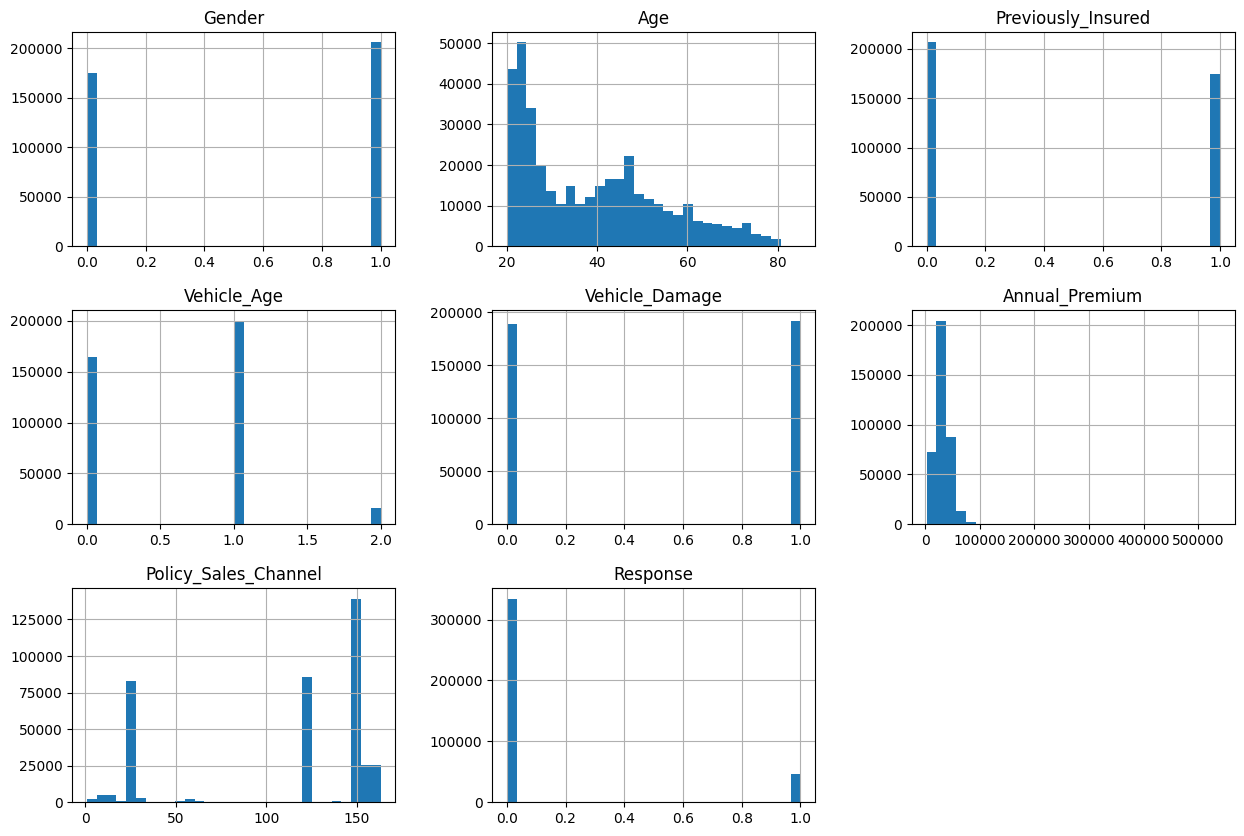

In [74]:
train_data.hist(bins=30, figsize=(15, 10))
plt.show()

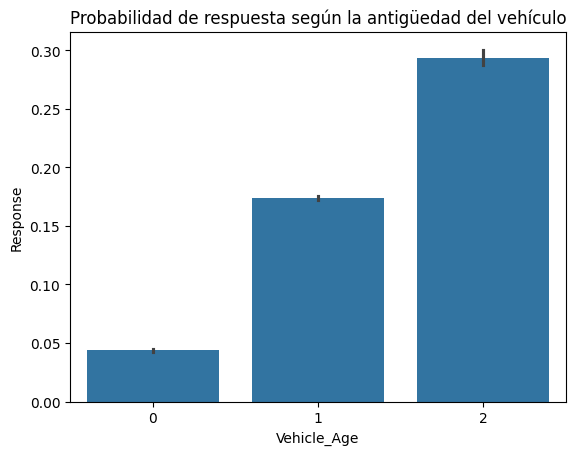

In [75]:
sns.barplot(x="Vehicle_Age", y="Response", data=train_data)
plt.title("Probabilidad de respuesta según la antigüedad del vehículo")
plt.show()

La mitjana de persones que estan interessades es: 12.256336113815209 %


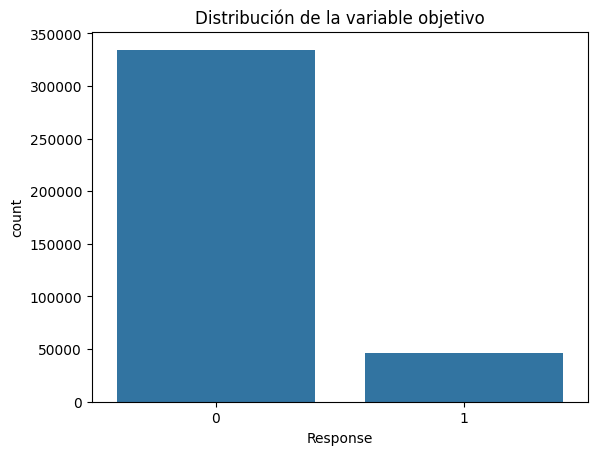

In [76]:
print("La mitjana de persones que estan interessades es:", (train_data[target].mean())*100, "%")
sns.countplot(x=target, data=train_data)
plt.title("Distribución de la variable objetivo")
plt.show()

In [77]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols=['Age','Annual_Premium','Policy_Sales_Channel']
scaler=MinMaxScaler()
scaler.fit(train_data[numeric_cols])
train_data[numeric_cols]=scaler.transform(train_data[numeric_cols])
test_data[numeric_cols]=scaler.transform(test_data[numeric_cols])

Al ver la gran diferencia en `Response` de 0 y 1 decidimos hacer oversampling para obtener resultados más precisos.

Métodos de aprendizaje

In [78]:

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Columnes d'entrada i variable objectiu
input_cols = train_data.columns[:-1].tolist()  # Totes les columnes menys l'última
target_col = 'Response'  # Variable objectiu

# Separar entrades i objectiu
inputs = train_data[input_cols]
targets = train_data[target_col]

# Aplicar SMOTE al conjunt d'entrenament
smote = SMOTE(random_state=42)
inputs_smote, targets_smote = smote.fit_resample(inputs, targets)

# Divisió entre conjunt d'entrenament i validació
train_inputs_smote, val_inputs_smote, train_targets_smote, val_targets_smote = train_test_split(
    inputs_smote, 
    targets_smote, 
    test_size=0.2, 
    random_state=42
)

Classification Report (Train) - SMOTE:
              precision    recall  f1-score   support

           0       0.96      0.59      0.73    267624
           1       0.70      0.98      0.82    267414

    accuracy                           0.78    535038
   macro avg       0.83      0.78      0.77    535038
weighted avg       0.83      0.78      0.77    535038

AUC-ROC (Train): 0.8312
Classification Report (Validation) - SMOTE: 
              precision    recall  f1-score   support

           0       0.96      0.59      0.73     66775
           1       0.71      0.98      0.82     66985

    accuracy                           0.79    133760
   macro avg       0.83      0.79      0.78    133760
weighted avg       0.83      0.79      0.78    133760

AUC-ROC (Validation): 0.8338


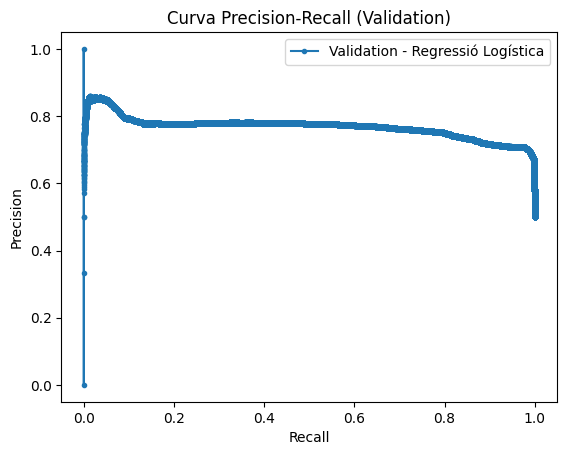

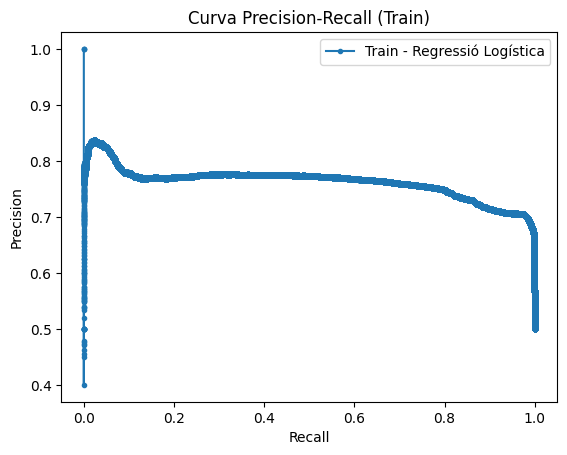

In [79]:
# Entrenar el model de regressió logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(train_inputs_smote, train_targets_smote)

# Ajust del llindar
threshold = 0.5

# Prediccions pel conjunt d'entrenament
train_pred_probs = model.predict_proba(train_inputs_smote)[:, 1]
train_pred = (train_pred_probs >= threshold).astype(int)

# Prediccions pel conjunt de validació
val_pred_probs = model.predict_proba(val_inputs_smote)[:, 1]
val_pred = (val_pred_probs >= threshold).astype(int)

# Avaluació pel conjunt d'entrenament
print("Classification Report (Train) - SMOTE:")
print(classification_report(train_targets_smote, train_pred))
print(f"AUC-ROC (Train): {roc_auc_score(train_targets_smote, train_pred_probs):.4f}")

# Avaluació pel conjunt de validació
print("Classification Report (Validation) - SMOTE: ")
print(classification_report(val_targets_smote, val_pred))
print(f"AUC-ROC (Validation): {roc_auc_score(val_targets_smote, val_pred_probs):.4f}")

# Corba Precision-Recall pel conjunt de validació
precision, recall, thresholds = precision_recall_curve(val_targets_smote, val_pred_probs)
plt.plot(recall, precision, marker='.', label='Validation - Regressió Logística')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall (Validation)')
plt.legend()
plt.show()

# Corba Precision-Recall pel conjunt d'entrenament
precision_train, recall_train, thresholds_train = precision_recall_curve(train_targets_smote, train_pred_probs)
plt.plot(recall_train, precision_train, marker='.', label='Train - Regressió Logística')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall (Train)')
plt.legend()
plt.show()

In [80]:
from sklearn.model_selection import train_test_split

# Columnes d'entrada i variable objectiu
input_cols = train_data.columns[:-1].tolist()  # Totes les columnes menys l'última
target_col = 'Response'  # Variable objectiu

# Separar entrades i objectiu
inputs = train_data[input_cols]
targets = train_data[target_col]

# Divisió entre conjunt d'entrenament i validació
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs, 
    targets, 
    test_size=0.2, 
    random_state=42
)

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    267700
           1       0.38      0.00      0.00     37187

    accuracy                           0.88    304887
   macro avg       0.63      0.50      0.47    304887
weighted avg       0.82      0.88      0.82    304887

AUC-ROC (Train): 0.8310
Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.45      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.66      0.50      0.47     76222
weighted avg       0.82      0.88      0.82     76222

AUC-ROC (Validation): 0.8354


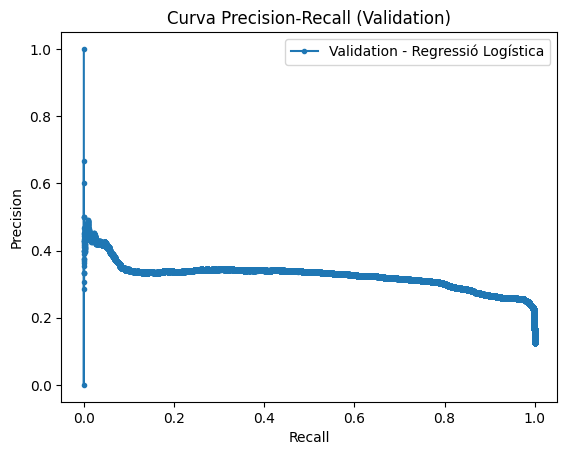

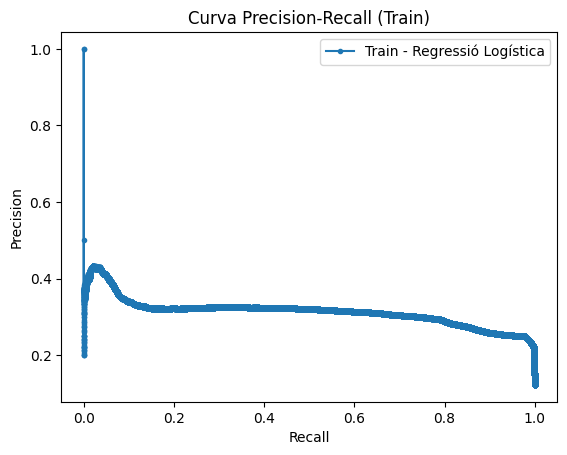

In [83]:
# Entrenar el model de regressió logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve

model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
model.fit(train_inputs, train_targets)

# Ajust del llindar
threshold = 0.5

# Prediccions pel conjunt d'entrenament
train_pred_probs = model.predict_proba(train_inputs)[:, 1]
train_pred = (train_pred_probs >= threshold).astype(int)

# Prediccions pel conjunt de validació
val_pred_probs = model.predict_proba(val_inputs)[:, 1]
val_pred = (val_pred_probs >= threshold).astype(int)

# Avaluació pel conjunt d'entrenament
print("Classification Report (Train):")
print(classification_report(train_targets, train_pred))
print(f"AUC-ROC (Train): {roc_auc_score(train_targets, train_pred_probs):.4f}")

# Avaluació pel conjunt de validació
print("Classification Report (Validation):")
print(classification_report(val_targets, val_pred))
print(f"AUC-ROC (Validation): {roc_auc_score(val_targets, val_pred_probs):.4f}")

# Corba Precision-Recall pel conjunt de validació
precision, recall, thresholds = precision_recall_curve(val_targets, val_pred_probs)
plt.plot(recall, precision, marker='.', label='Validation - Regressió Logística')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall (Validation)')
plt.legend()
plt.show()

# Corba Precision-Recall pel conjunt d'entrenament
precision_train, recall_train, thresholds_train = precision_recall_curve(train_targets, train_pred_probs)
plt.plot(recall_train, precision_train, marker='.', label='Train - Regressió Logística')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall (Train)')
plt.legend()
plt.show()

RandomForest

Ara comprovem amb altres models: Random Forest, Gradient Boosting y KNN.

Classification Report (Train) - Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.60      0.74    267624
           1       0.71      0.98      0.83    267414

    accuracy                           0.79    535038
   macro avg       0.84      0.79      0.78    535038
weighted avg       0.84      0.79      0.78    535038

AUC-ROC (Train): 0.8635
Classification Report (Validation) - Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.60      0.74     66775
           1       0.71      0.98      0.83     66985

    accuracy                           0.79    133760
   macro avg       0.84      0.79      0.78    133760
weighted avg       0.84      0.79      0.78    133760

AUC-ROC (Validation): 0.8639


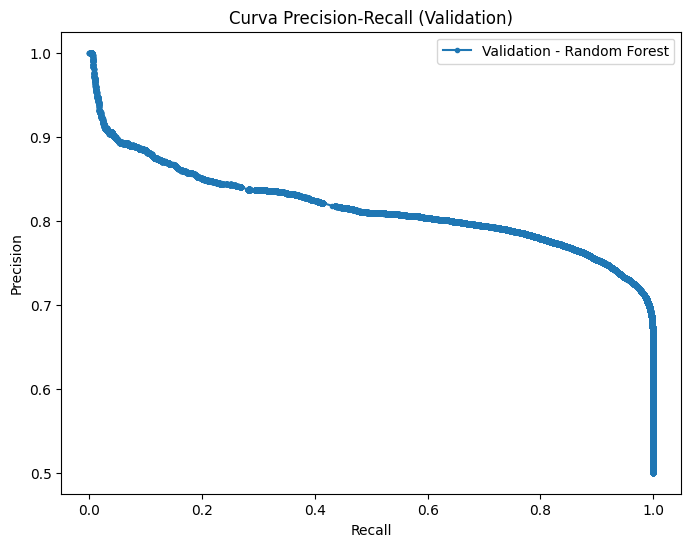

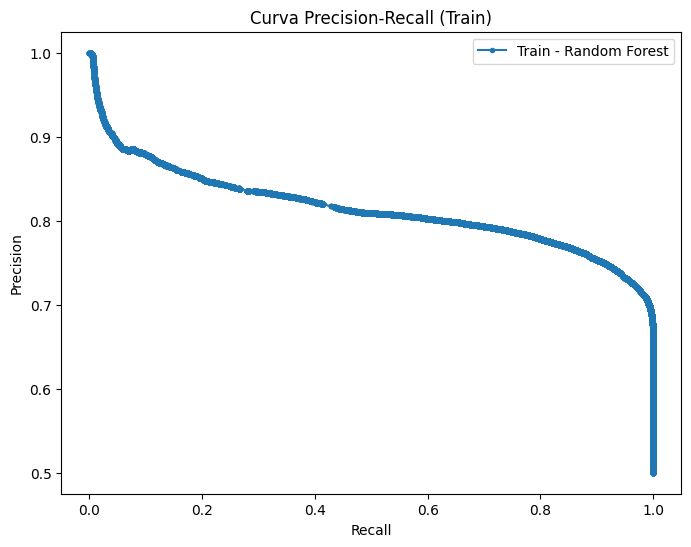

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt

# Crear el model de Random Forest centrat en el Recall
rf_model = RandomForestClassifier(
    n_estimators=100, 
    max_depth=10, 
    random_state=42
)

# Entrenar el model amb les dades SMOTE
rf_model.fit(train_inputs_smote, train_targets_smote)

# Ajust del llindar de predicció
threshold = 0.3

# Prediccions pel conjunt d'entrenament
train_pred_probs = rf_model.predict_proba(train_inputs_smote)[:, 1]
train_pred = (train_pred_probs >= threshold).astype(int)

# Prediccions pel conjunt de validació
val_pred_probs = rf_model.predict_proba(val_inputs_smote)[:, 1]
val_pred = (val_pred_probs >= threshold).astype(int)

# Avaluació del conjunt d'entrenament
print("Classification Report (Train) - Random Forest:")
print(classification_report(train_targets_smote, train_pred))
print(f"AUC-ROC (Train): {roc_auc_score(train_targets_smote, train_pred_probs):.4f}")

# Avaluació del conjunt de validació
print("Classification Report (Validation) - Random Forest:")
print(classification_report(val_targets_smote, val_pred))
print(f"AUC-ROC (Validation): {roc_auc_score(val_targets_smote, val_pred_probs):.4f}")

# Corba Precision-Recall pel conjunt de validació
precision, recall, thresholds = precision_recall_curve(val_targets_smote, val_pred_probs)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Validation - Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall (Validation)')
plt.legend()
plt.show()

# Corba Precision-Recall pel conjunt d'entrenament
precision_train, recall_train, thresholds_train = precision_recall_curve(train_targets_smote, train_pred_probs)
plt.figure(figsize=(8, 6))
plt.plot(recall_train, precision_train, marker='.', label='Train - Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall (Train)')
plt.legend()
plt.show()


Comparació de corves ROC de cada model.

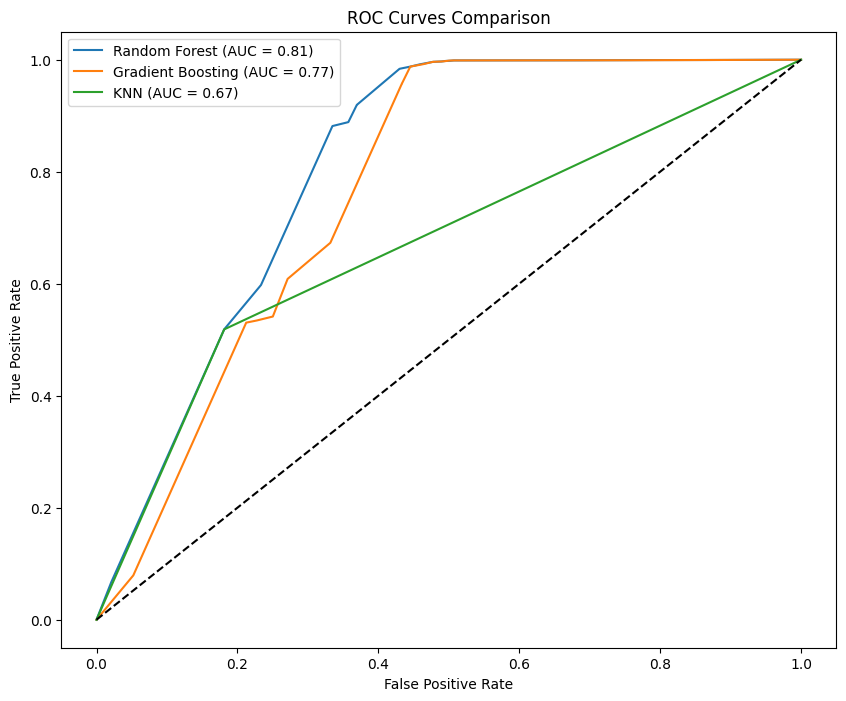

In [195]:
from sklearn.metrics import roc_curve, auc

# Curvas ROC
plt.figure(figsize=(10, 8))

for name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc(fpr, tpr):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.show()


Feature Importance (Random Forest):
                Feature  Importance
2    Previously_Insured    0.390957
4        Vehicle_Damage    0.262029
1                   Age    0.149441
6  Policy_Sales_Channel    0.107288
0                Gender    0.052939
3           Vehicle_Age    0.022373
5        Annual_Premium    0.014973


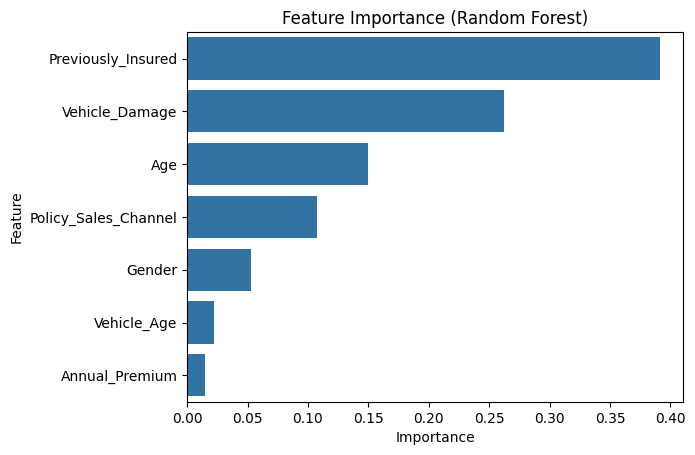

In [196]:
# Feature Importance para Random Forest
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance (Random Forest):")
print(feature_importance)

# Visualización
sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title("Feature Importance (Random Forest)")
plt.show()

Realitzem una cerca d'hiperparàmetres per Random Forest utilitzant RandomizedSearch.

In [197]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    scoring='roc_auc',
    n_iter=10,  # Número de combinaciones a probar
    cv=3,
    verbose=2,
    n_jobs=-1
)

random_search.fit(X_train_smote, y_train_smote)

print("Best parameters found:")
print(random_search.best_params_)
print("Best AUC-ROC:", random_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found:
{'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Best AUC-ROC: 0.9146372610928643


Realitzem una cerca d'hiperparàmetres per Random Forest utilitzant GridSearch.

In [198]:
from sklearn.model_selection import GridSearchCV

# Hiperparámetros reducidos para evitar largos tiempos
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1  # Usar múltiples núcleos
)

grid_search.fit(X_train_smote, y_train_smote)

print("Best parameters found:")
print(grid_search.best_params_)
print("Best AUC-ROC:", grid_search.best_score_)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters found:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best AUC-ROC: 0.9143862130928587


Cross-Validation.

In [199]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    RandomForestClassifier(**random_search.best_params_, random_state=42),
    X_train_smote,
    y_train_smote,
    scoring='roc_auc',
    cv=5  # Número de particiones
)
print("AUC-ROC scores:", scores)
print("Mean AUC-ROC:", scores.mean())

AUC-ROC scores: [0.86490115 0.92816402 0.92968591 0.9286356  0.92768042]
Mean AUC-ROC: 0.9158134182089601


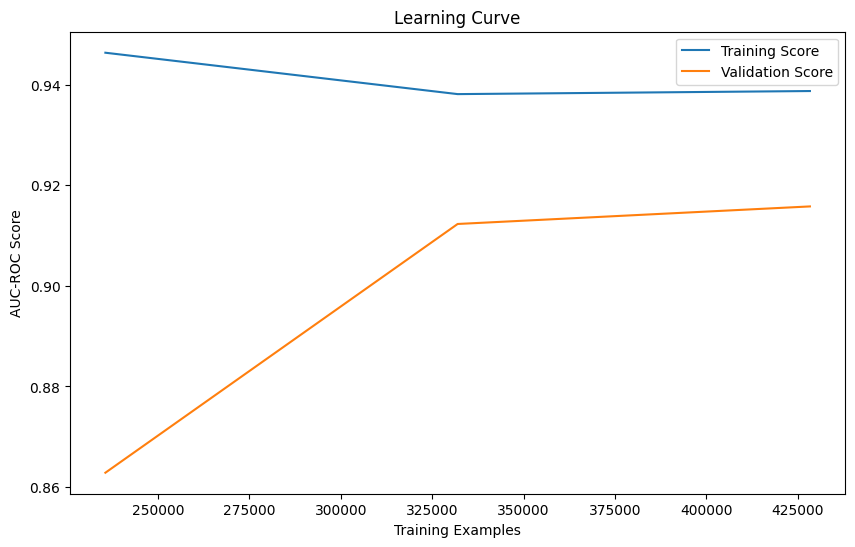

In [200]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(**random_search.best_params_, random_state=42),
    X_train_smote,
    y_train_smote,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.xlabel("Training Examples")
plt.ylabel("AUC-ROC Score")
plt.legend()
plt.title("Learning Curve")
plt.show()

In [96]:
# Prediccions al conjunt de test
best_rf_model = RandomForestClassifier(**random_search.best_params_, random_state=42)
best_rf_model.fit(X_train_smote, y_train_smote)
y_pred = best_rf_model.predict(X_test)

# Ajustar el llindar de probabilitat
threshold = 0.3 
y_pred_prob = best_rf_model.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_pred_prob >= threshold).astype(int)

# Avaluar amb el llindar ajustat
print(f"Classification Report amb llindar {threshold}:")
print(classification_report(y_test, y_pred_adjusted))

# Mostrar accuracy ajustat
adjusted_accuracy = accuracy_score(y_test, y_pred_adjusted)
print(f"Accuracy amb llindar ajustat ({threshold}): {adjusted_accuracy}")


Classification Report amb llindar 0.3:
              precision    recall  f1-score   support

           0       0.92      0.80      0.85     66699
           1       0.27      0.53      0.36      9523

    accuracy                           0.76     76222
   macro avg       0.60      0.66      0.61     76222
weighted avg       0.84      0.76      0.79     76222

Accuracy amb llindar ajustat (0.3): 0.7623520768282124


In [ ]:
# Prediccions al conjunt de test
best_rf_model = RandomForestClassifier(**random_search.best_params_, random_state=42)
best_rf_model.fit(X_train_smote, y_train_smote)
y_pred = best_rf_model.predict(X_test)

# Ajustar el llindar de probabilitat
threshold = 0.7 
y_pred_prob = best_rf_model.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_pred_prob >= threshold).astype(int)

# Avaluar amb el llindar ajustat
print(f"Classification Report amb llindar {threshold}:")
print(classification_report(y_test, y_pred_adjusted))

# Mostrar accuracy ajustat
adjusted_accuracy = accuracy_score(y_test, y_pred_adjusted)
print(f"Accuracy amb llindar ajustat ({threshold}): {adjusted_accuracy}")


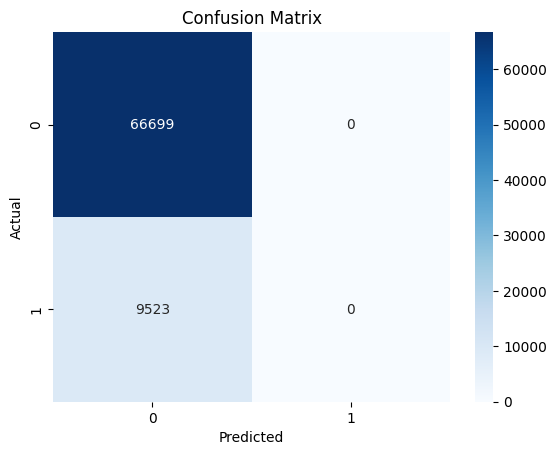

In [201]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = random_search.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [202]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.00      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



c:\Users\pauwh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pauwh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pauwh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

*Ahora que hemos visto los resultados, podemos decir que tenemos un gran problema a la hora de detectar la clase 1, por ello vamos a hacer varios ajustes*

Bajar el threshold
Utilizar modelos más avanzados
Cambiar el scoring de roc_auc a recall